# Regresión Lineal Multivariable

La regresión lineal múltiple es un método estadístico utilizado para predecir el resultado de una variable de respuesta mediante la combinación de numerosas variables explicativas o características. Es una variante de la regresión lineal (mínimos cuadrados ordinarios) en la que se utiliza una sola variable explicativa. 

La siguiente es la relación lineal entre las variables dependientes e independientes:

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \ldots$

Donde 
* $y$ = variable dependiente u objetivo
* $\beta_0$ = Intercepto de la regresión lineal
* $\beta_1, \beta_2, \beta_3, \dots, \beta_n$ = Pendiente de la línea de regresión que indica si la línea es creciente o decreciente.
* $X_1, X_2, X_3, \dots, X_n$ = Variable independiente, predictora

## Aplicación del Método de Regresión Lineal

Este método será utilizado para predecir el precio de laptops en función de sus especificaciones. Los datos provienen del siguiente conjunto de datos, el cual servirá como base para entrenar el modelo y evaluar su precisión en la estimación de precios.

> **Fuente de los datos:**  
> 📊 [Dataset de precios de laptops](https://www.kaggle.com/datasets/muhammetvarl/laptop-price/data)  
> Incluye 11 especificaciones: Compañía, producto (marca y modelo), tipo, tamaño de pantalla procesador, resolución de pantalla, CPU, RAM, memoria, GPU, sistema operativo y peso. 

### Preprocesamiento de datos para: "Laptop Price"

Se comienza importando las librerías esenciales:
- 'pandas' para lectura y manipulación de datos
- 'numpy' para cálculos matemáticos
- 'matplotlip'  y 'seaborn' para visualizaciones en gráficas

In [86]:
#Importando librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None # Configurar pandas

#Leyendo los datos
df = pd.read_csv('./datasources/laptops/laptop_price.csv', encoding='latin-1') # codificación 'latin-1' para manejar caracteres especiales

#Mostrando el dataset
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


Observando el total de columnas y filas en el dataset:

In [88]:
df.shape

(1303, 13)

Verificando que no tenga filas duplicadas:

In [91]:
df.duplicated().sum()

0

Verificando que no falten datos:

In [94]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Por el momento, el archivo no tiene filas duplicadas y se ha importado sin problemas.

### Exploración y limpieza inicial
#### Analizando y convirtiendo datos

En ninguna de las columnas hacen falta datos, por lo que no es necesario tomar otra acción.

Identificando los tipos de datos encontrados en el archivo:

In [96]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

Se eliminará la columna de "laptop_ID", ya que no nos aporta datos importantes para el entrenamiento del modelo.

In [99]:
df.drop('laptop_ID', axis=1, inplace=True)

#### Conversiones básicas

Ahora se extraeran los datos encontrados en cada una de las columnas para poder ocuparlas cómo valores numéricos, las variables completamente nominales serán tratadas más adelante.

Para el peso se eliminará la parte de "kg", ya que se todos los pesos están expresados con las mismas unidades en toda la tabla, así se podrá trabajar con una variable de tipo float.

In [104]:
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=df['Weight'].astype('float64')

Para la RAM, se eliminará "GB" de la misma forma.

In [107]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Ram']=df['Ram'].astype('int64')

Luego se convertirá el precio de euros a dólares, para poder apreciar de mejor manera los resultados:

In [110]:
df.rename(columns={'Price_euros':'Price'}, inplace=True)
df.loc[:, 'Price'] *=1.13

#### Valores extremos o Outliers

Para observar los valores extremos se pueden ocupar los diagramas de caja, los cuales grafican la media de la variable y los cuartiles que se encuentran antes y después de esta, siendo los cuartiles la media de los dos conjuntos de valores que fueron separados por la media original.

Usando los diagramas de caja:

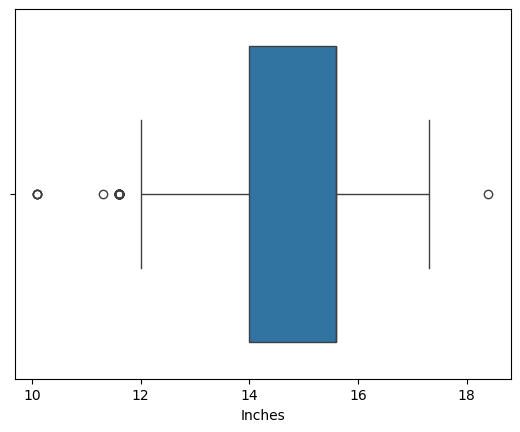

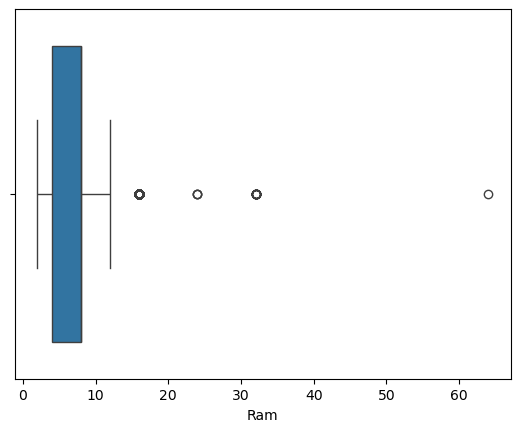

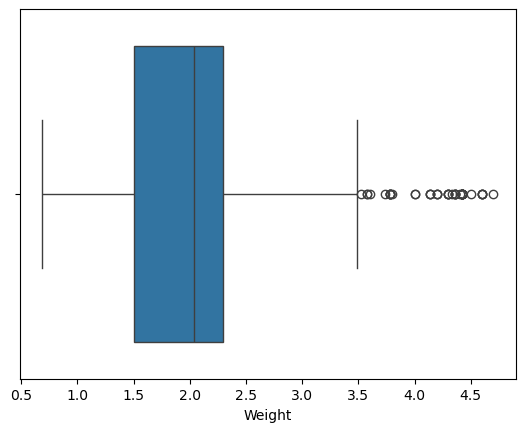

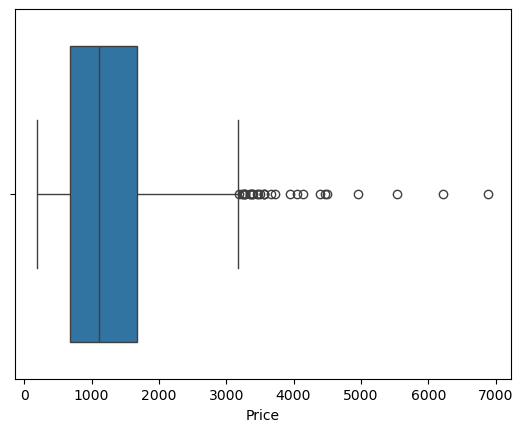

In [113]:
#Se grafican todas las columnas numéricas del dataset
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

No se graficarán las demás variables en este momento debido a que son nominales y serán tratadas luego.

#### Duplicados
Identificando valores duplicados:

In [117]:
df.duplicated().sum()

28

Originalmente, como contabamos con la columna de "laptop_ID", no se marcaba ningún duplicado, pero al quitar esta se marcan 28 filas como duplicadas, lo cual significa que sí habían valores duplicados, los cuales solo tenían de diferencia la ID asignada, debido a esto es necesario es necesario eliminar dichas filas, para esto se puede ocupar la función drop_duplicates() de la librería Pandas.

In [120]:
df=df.drop_duplicates()

Comprobando que no queden duplicados:

In [123]:
df.duplicated().sum()

0

#### Visualización
Para poder visualizar los datos se puede ocupar una matriz de correlación, la cual asigna un valor entre -1 y 1 las columnas del dataset para representar la relación entre las variables que representan, siendo este dato conocido como el coeficiente de correlación de Pearson, el cual es método utilizado por la librería de Pandas al llamar su función de correlación; la fórmula ocupada para conseguir este dato es la siguiente:

\begin{align*}
r_{xy} = \frac{\sum_{i=1}^{n} (x\cdot y) - \sum_{i=1}^{n} (x) \sum_{i=1}^{n} (y)}{\sqrt{[n\cdot(\sum_{i=1}^{n} (x^2)-(\sum_{i=1}^{n} (x))^2)]\cdot[n\cdot(\sum_{i=1}^{n} (y^2)-(\sum_{i=1}^{n} (y))^2)]}}
\end{align*}

Donde "n" representa el número de filas, mientras que "x" e "y" representan las distintas columnas que serán comparadas entre sí dentro del dataset.

Hasta el momento solo se han obtenido 4 variables numéricas, por lo que si se utiliza una matriz de correlación se obtiene el siguiente resultado:

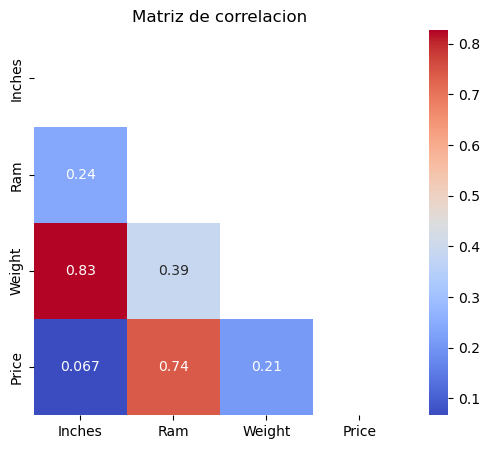

In [126]:
#Se define el tamaño del gráfico
plt.figure(figsize=(6,5))

#Se coloca la matriz de correlación dentro de la función "Heatmap" de Seaborn para poder realizar la gráfica de la matriz
sns.heatmap(df.select_dtypes(include=['number']).corr(), mask=np.triu(df.select_dtypes(include=['number']).corr()), cmap='coolwarm', annot=True)
plt.title('Matriz de correlacion')
plt.show()

Se observa que, de los datos actuales, la RAM es la variable con mayor relación al precio, pero hacen falta la mayoría de los componentes de la laptop, por lo que luego se observará esta matriz con los datos restantes cuando ya hayan sido convertidos a valores numéricos.

### Manejo de variables categóricas (Encoding)

#### One-Hot Encoding:

Este encoding convierte cada valor encontrado dentro de las columnas nominales en valores de 1 o 0, los que también se pueden representar por verdaderos y falsos, donde se colocará un 1 si la fila contiene cierto valor, por ejemplo, a la hora de aplicarlo a una lista de compañias, se crearan nuevas columnas en cada fila donde se mostrará si esta pertenece a cierta compañia, debido a esto se creará una columna por cada compañia.

Primero se intentará ocupar la función pandas.get_dummies() para poder clasificar variables nominales usando el One-Hot Encoding, siendo estas: "Company", "Product", "TypeName", "ScreenResolution", "Cpu", "Memory", "Gpu" y "OpSys".

In [131]:
pd.get_dummies(df)

,Inches,Ram,Weight,Price,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,1513.8497,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,13.3,8,1.34,1015.8022,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.6,8,1.86,649.7500,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.4,16,1.83,2867.3185,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,13.3,8,1.37,2038.0680,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,14.0,4,1.80,720.9400,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1271,13.3,16,1.30,1693.8700,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1272,14.0,2,1.50,258.7700,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1273,15.6,6,2.19,863.3200,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Como se puede observar, esta función crea demasiadas columnas para este caso, por lo que se trabajará con otro método para que el dataset final sea más compacto.

### División del conjunto de datos en un conjunto de entrenamiento y uno de prueba

Utilizamos una división de entrenamiento y prueba, diviendo el conjunto de datos en dos grupos. El conjunto de entrenamiento, utilizado para entrenar el modelo y el conjunto de prueba utilizado para evaluar su rendimiento. La división habitual para una cantidad de datos relativamente pequeña (~1000 - 5000 muestras) es de 70% - 30%.
Esto permite que el modelo aprenda patrones a partir de los datos de entrenamiento, dado que si el modelo se entrenara con todo el conjunto de datos, podría memorizarlos en lugar de aprender patrones generalizables a partir de una estimación imparcial. 


In [144]:
def manual_train_test_split(df, test_size=0.3, random_state=42):
    np.random.seed(random_state)  # Fija la "semilla" del generador de números aleatorios de NumPy para garantizar reproducibilidad
    indices = np.random.permutation(len(df))  # Mezcla aleatoria
    n_test = int(len(df) * test_size)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    train_df = df.iloc[train_indices].copy()
    test_df = df.iloc[test_indices].copy()
    return train_df, test_df

In [146]:
train_df, test_df = manual_train_test_split(df, test_size=0.3, random_state=42)

### Preprocesamiento 

#### Extracción de características

Extranemos del texto información numérica cuantificable, esto establece un esquema comparativo estandarizado y facilitará la identificación de patrones.

In [148]:
# --- Funciones auxiliares para preprocesamiento ---
def split_cpu_frequency(cpu):
    return float(cpu.split()[-1].replace('GHz',''))

def extract_cpu_model(cpu):
    import re
    return re.sub(r'(\d+(?:\.\d+)?GHz)', '', cpu).strip()

def extract_gpu_brand(gpu):
    return gpu.split()[0]

def extract_gpu_model(gpu):
    parts = gpu.split()
    if len(parts) == 1:
        return ''
    return ' '.join(parts[1:])

#### Procesamiento de variable Memoria

Luego para la columna "Memory":

In [152]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

Como se puede observar, la columna presenta cadenas con múltiples formatos y combinaciones, con unidades incosistentes, almacenamientos mezclados y formatos no estandarizados. Para limpiar los datos se convierte tamaños de almacenamiento en terabytes a gigabytes para mantener una unidad común (GB)


In [155]:
# Limpieza de GB y TB. EJ: 256gb -> 256, 1TB -> 1000

def convert_size(size_text):
    size_text = size_text.replace(" ", "")
    if "TB" in size_text:
        return int(float(size_text.replace("TB", "")) * 1000)
    elif "GB" in size_text:
        return int(float(size_text.replace("GB", "")))
    return 0

Se debe transformar la columna Memory a columnas numéricas separadas para cada tipo de almacenamiento, de los cuales se identifican cuatro: SSD, HDD, Flash Storage y Hybrid. 

In [158]:
def process_memory(df):
    #Creando una copia del dataset para no afectarlo con los distintos cambios que se realizarán al mismo tiempo
    df = df.copy() 
    
    df[['Storage', 'SSD', 'HDD', 'Flash Storage', 'Hybrid']] = 0
    for i, row in df.iterrows():         
        memory = row['Memory']
        devices = memory.split('+')            
        total = ssd = hdd = flash = hybrid = 0 #contadores
        for device in devices:      
            parts = device.strip().split()
            if len(parts) >= 2:
                size = convert_size(parts[0])
                dtype = " ".join(parts[1:])
                total += size
                if 'SSD' in dtype:
                    ssd += size
                elif 'HDD' in dtype:
                    hdd += size
                elif 'Flash' in dtype:
                    flash += size
                elif 'Hybrid' in dtype:
                    hybrid += size
                    
        df.loc[i, ['Storage', 'SSD', 'HDD', 'Flash Storage', 'Hybrid']] = [total, ssd, hdd, flash, hybrid]
    df.drop('Memory', axis=1, inplace=True)       # Elimina la columna 'Memory' original, ya no es necesaria
    return df

#### Procesamiento de variable pantalla

También se realizará un proceso similar para la variable "ScreenResolution", se extrae información útil de la columna, como la resolución de pandalla (width, height), si la pantalla es táctil y otros detalles del tipo de pantalla.

In [162]:
def process_screen(df):
    df = df.copy()
    
    df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
    df[['Width', 'Height']] = df['Resolution'].str.split('x', expand=True).astype(int)

    # Extraer tipo de pantalla
    df['Screen'] = df['ScreenResolution'].str.replace(r'(\d+x\d+)', '', regex=True).str.replace('/', '', regex=True)
    df['Touchscreen'] = df['Screen'].str.contains('Touchscreen').astype(int)
    df['Screen'] = df['Screen'].str.replace('Touchscreen', '', regex=True).str.strip()

    # Eliminar columnas temporales y la original 
    df.drop(['ScreenResolution', 'Resolution'], axis=1, inplace=True) 
    return df

#### Procesamiento para CPU Y GPU

Utilizando las funciones auxiliares previamente establecidas, la función preprocess(df) ejecuta la limpieza y extracción de características útiles de las columnas Cpu, Gpu, Memory y ScreenResolution.

In [166]:
def preprocess(df):
    df = df.copy()
    df['CpuFrequency'] = df['Cpu'].apply(split_cpu_frequency)
    df['CpuModel'] = df['Cpu'].apply(extract_cpu_model)
    df.drop('Cpu', axis=1, inplace=True)         # Eliminación de columna original

    df['GpuBrand'] = df['Gpu'].apply(extract_gpu_brand)
    df['GpuModel'] = df['Gpu'].apply(extract_gpu_model)
    df.drop('Gpu', axis=1, inplace=True)         # Eliminación de columna original

    df = process_memory(df)
    df = process_screen(df)
    return df

### Aplicación del preprocesamiento a los datasets

Una vez definida la función preprocess, se aplica tanto al conjunto de entrenamiento como al de prueba para estandarizar el formato en ambos.

In [170]:
train_df = preprocess(train_df)
test_df = preprocess(test_df)

### Target encoding

El Target Encoding se ocupa para tratar con variables categóricas, se basa en la media de la variable de predicción, por lo que ya no existe forma de que los valores numéricos con los que se reemplazan las variables originales tengan algún orden o jerarquía por las que estén clasificadas, lo cual funciona de mejor manera para este caso.

Aunque es mucho más fácil calcular la media de cada columna al compararla con la variable de predicción, puede que este proceso presente problemas al ocupar el modelo creado para otro conjunto de datos, para esto existe la técnica llamada "Additive Smoothing", en la cual se ocupa otra fórmula para conseguir la media de cada columna, tomando en cuenta la media general, donde se deberá especificar cuantos valores deben de existir para que la media de la muestra supere la media general; la ecuación para este proceso es la siguiente:

\begin{equation}
\mu=\frac{n \times \bar{x}+m \times w}{n+m}
\end{equation}

Donde queremos encontrar el valor por el cual vamos a reemplazar las columnos $(\mu)$, usando la media estimada $(\bar{x})$, el número de valores $(n)$, el peso que le deseamos otorgar a la media general $(m)$ y la propia media general $(w)$.

In [174]:
def target_encode(train, test, by, on, m=300):

    # Media global de target 
    mean_global = train[on].mean()
    agg = train.groupby(by)[on].agg(['count', 'mean'])   #Conteo y media por categoria
    counts = agg['count']
    means = agg['mean']

    # Formula de suavizado
    smooth = (counts * means + m * mean_global) / (counts + m)

    # Aplicación de encoding a traing y test
    train[by] = train[by].map(smooth)
    test[by] = test[by].map(smooth).fillna(mean_global)
    return train, test

Se aplica esta codificación suavizada tanto al conjunto de entrenamiento como al de prueba. 

In [177]:
categorical_cols = ['Company', 'Product', 'TypeName', 'Screen', 'CpuModel', 'GpuBrand', 'GpuModel', 'OpSys']
for col in categorical_cols:
    train_df, test_df = target_encode(train_df, test_df, col, 'Price')

### Normalización

Uno de los métodos para poder normalizar las variables de un dataset es el de "Mín. Máx", el cual hace una transformación lineal a los datos originales, colocandolos en una escala entre 0 y 1, su fórmula está definida como:

\begin{equation}
\ x_{escalado}=\frac{x-x_{min}}{x_{max}-x_{min}}
\end{equation}

Para poder ocupar el método del gradiente descendiente, es necesario tener variables normalizadas, se ocupará el método de "Mín. Máx." debido a que hay variables con distintas escalas dentro de los datos, por ejemplo, entre el peso y la RAM, ya que el peso se encuentra entre 0.6 y 5, mientras que la RAM se encuentra entre 2 y 64, comprobando esto:

In [181]:
df['Weight'].min()

0.69

In [183]:
df['Weight'].max()

4.7

In [185]:
df['Ram'].min()

2

In [187]:
df['Ram'].max()

64

Aplicando el método:

In [190]:
def min_max_normalize(train, test, cols):
    min_vals = train[cols].min()
    max_vals = train[cols].max()
    train[cols] = (train[cols] - min_vals) / (max_vals - min_vals)
    test[cols] = (test[cols] - min_vals) / (max_vals - min_vals)
    return train, test

La normalización se aplica a todas las variables predictores (numeric_cols)

In [193]:
numeric_cols = train_df.columns.drop('Price')
train_df, test_df = min_max_normalize(train_df, test_df, numeric_cols)

In [201]:
#Observando como han quedado los cambios
train_df

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price,CpuFrequency,CpuModel,...,GpuModel,Storage,SSD,HDD,Flash Storage,Hybrid,Width,Height,Screen,Touchscreen
438,0.537629,0.551789,0.882875,0.469880,0.354839,0.876397,0.157107,2691.6600,0.666667,0.633024,...,0.478747,0.201278,0.512,0.00,0.0000,0.0,0.482619,0.482759,0.000000,0.0
314,0.501082,0.361477,0.624603,0.180723,0.000000,0.876397,0.102244,310.7500,0.074074,0.169202,...,0.000000,0.009585,0.000,0.00,0.0625,0.0,0.000000,0.000000,0.000000,1.0
1032,1.000000,0.427904,1.000000,0.867470,0.096774,0.876397,0.501247,1346.7340,0.703704,1.000000,...,0.518553,0.447284,0.128,0.50,0.0000,0.0,0.223929,0.224138,0.887577,0.0
319,0.000000,0.400568,0.000000,0.180723,0.032258,0.876397,0.177057,548.0500,0.259259,0.334768,...,0.332760,0.047923,0.000,0.00,0.2500,0.0,0.000000,0.000000,0.000000,0.0
1039,0.524424,0.410062,0.000000,0.469880,0.096774,0.876397,0.236908,1141.8763,0.592593,0.152006,...,0.478747,0.099042,0.256,0.00,0.0000,0.0,0.223929,0.224138,0.887577,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.524424,0.501742,0.000000,0.469880,0.032258,0.876397,0.211970,1130.0000,0.518519,0.342684,...,0.290001,0.196486,0.000,0.25,0.0000,0.0,0.223929,0.224138,0.887577,0.0
1095,0.000000,0.413354,0.000000,0.662651,0.096774,0.876397,0.426434,902.8700,0.592593,0.152006,...,0.420058,0.498403,0.256,0.50,0.0000,0.0,0.223929,0.224138,0.887577,0.0
1130,0.524424,0.406432,0.000000,0.662651,0.096774,0.876397,0.336658,710.7700,0.666667,0.633024,...,0.478747,0.795527,0.000,1.00,0.0000,0.0,0.000000,0.000000,0.000000,0.0
860,0.537629,0.392550,0.000000,0.662651,0.096774,0.876397,0.401496,961.2458,0.592593,0.152006,...,0.478747,0.396166,0.000,0.50,0.0000,0.0,0.223929,0.224138,1.000000,0.0


### Preparación de datos para entrenamiento 

Se separan las variables predictoras (X) del target (y), tanto para el conjunto de entrenamiento como para el de prueba. Para esto, se elimina la columna Price del DataFrame original y se almacena por separado como variable objetivo. 

In [205]:
X_train = train_df.drop('Price', axis=1).values
y_train = train_df['Price'].values.reshape(-1,1)
X_test = test_df.drop('Price', axis=1).values
y_test = test_df['Price'].values.reshape(-1,1)

Para incluir el término indpendiente $\beta_0$ en las operaciones matriciales, agregamos una columna de 1's al inicio de x. 

In [208]:
# np.hstack() concatena horizontalmente la columna de 1's con el resto de las características

# Preparación de x_train y x_test (con bias)
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])

Ahora nos hemos quedado con las siguientes columnas:

In [278]:
train_df.dtypes

Company          float64
Product          float64
TypeName         float64
Inches           float64
Ram              float64
OpSys            float64
Weight           float64
Price            float64
CpuFrequency     float64
CpuModel         float64
GpuBrand         float64
GpuModel         float64
Storage          float64
SSD              float64
HDD              float64
Flash Storage    float64
Hybrid           float64
Width            float64
Height           float64
Screen           float64
Touchscreen      float64
dtype: object

Todas son númericas por lo que podemos observar nuevamente los diagramas de caja, pero ahora con todas las variables.

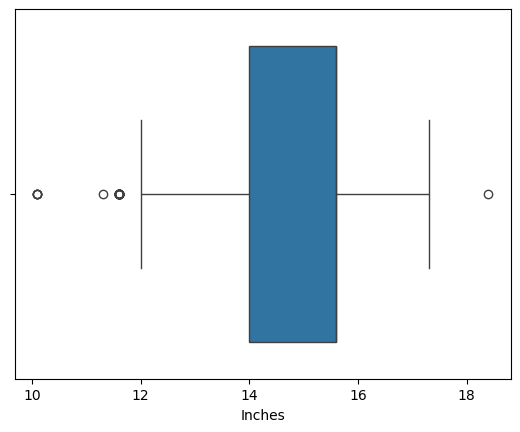

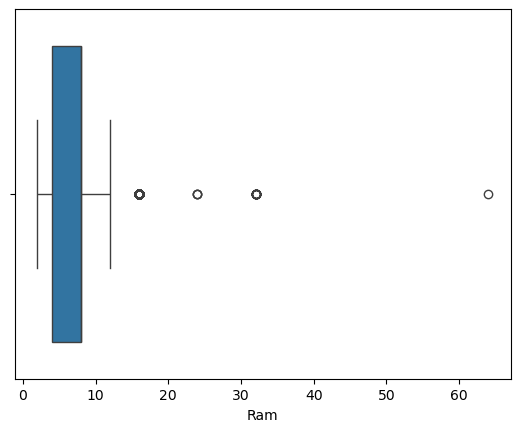

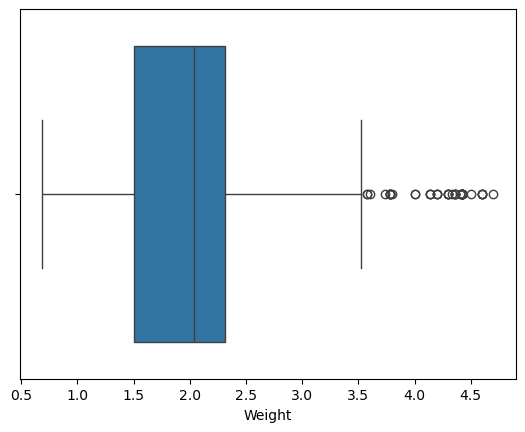

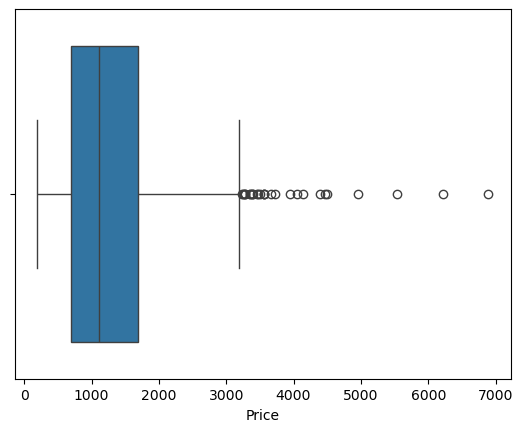

In [264]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

### Implementación de modelo de Regresión Lineal

### Predict

Se realiza la multiplicación matricial $\hat{y} = \mathbf{X} \cdot \theta$ siendo X la matriz de características (incluyendo la columna de 1's para el intercerpo) y theta el vector de coeficientes aprendidos del modelo, que incluye tanto los coeficientes de cada variable como el bias.

In [213]:
# Función que predice de acuerdo a una regreisón lineal al recibir como parámetros la matriz X de características y el vector de parámetros theta.
def predict(X, theta):
    if X.shape[1] != theta.shape[0]:
        raise ValueError("Dimensiones incompatibles")
    return X @ theta # multiplicación matricial

Esta multiplicación matricial genera un vector de predicciones $\hat{y}$ para cada fila de $x$, donde cada valor representa la salida del modelo para un ejemplo específico. 

### Evaluación del rendimiento del modelo

Para evaluar el rendimiento de nuestro modelo,se implementa una función de costo de regresión lineal con factor estándar $1/2m$. Esta función mide el error entre las predicciones del modelo y los valores reales. Es el error cuadrático medio ajustado, en cuando más bajo sea esta valor, mejor es el desempeño del modelo. . 

\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2
\end{equation}

Donde: 
1. $J(\theta)$: Función de costo (también llamada "pérdida"), representa el error promedio del modelo y depende del vector de parámetros $(\theta)$

2. $\frac{1}{2m}$: Factor de normalización: \(m\) = número de ejemplos de entrenamiento. El 2 se incluye para simplificar derivadas (se cancela al derivar)

3. $\sum_{i=1}^{m}$:Sumatoria sobre todos los ejemplos del conjunto de entrenamiento. $i$ indexa cada ejemplo (de 1 a $m$)

4. $h_{\theta}(x^{(i)})$: Función de hipótesis (predicción del modelo), evalúa la predicción para el ejemplo $(x^{(i)})$

5. $y^{(i)}$: Valor real (etiqueta) del ejemplo $i$-ésimo
     

6. $\left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2$: Error cuadrático (penaliza más los errores grandes)

In [222]:
def compute_cost(X, y, theta):
    m      = len(y)
    errors = predict(X, theta) - y
    return (1/(2*m)) * np.sum(errors**2)

#### Coeficiente de determinación $R^2$


Este valor mide la proporción de la varianza de la variable dependiente que es explicada por el modelo. Mientras más cercano sea su resultado a 1, mayor poder explicativo posee el modelo, valores próximos a 0, por otra parte, reflejan que el modelo no mejora la predicción.
La función calcula su valor a través del complemento del cociente entre la suma de residuos al cuadrado que mide el error entre las predicciones del modelo y los valores reales $(SS_{\text{res}})$ y la suma total al cuadrado que mide la varianza total de los datos reales con respecto a su media $(SS_{\text{tot}})$ 

\begin{equation}
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} = 1 - \frac{\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum\limits_{i=1}^{n} (y_i - \bar{y})^2}
\end{equation}

In [227]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/(ss_tot + 1e-10) # 1e-10 evita división por cero

#### El Error Cuadrático Medio (RMS)

$$
E_{\mathrm{RMS}} = \sqrt{2 E(\mathbf{w^{*}}) / N}
$$

Se calcula co la raiz cuadrada del resultado de la función de costo definida previamente, permite evaluar e interpretar el desempeño al indicar que tan lejos están, en promedio, las predicciones del modelo respecto a los valores reales.
La división por N permite comparar conjuntos de datos de diferentes tamaños en igualdad de condiciones, y la raíz cuadrada garantiza que ERMS se mida en la misma escala (y en las mismas unidades) que la variable objetivo. 


### Implementación descenso de gradiente

La regla de actualización para cada paso $t$ es:

\begin{align*}
\theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{m} X^\top \left( X \theta^{(t)} - y \right)
\end{align*}

El método actualiza los parámetros $(\theta)$ (coeficientes del modelo) moviéndolos en dirección opuesta al gradiente de la función de costo, con un tamaño de paso controlado por la tasa de aprendizaje α.

In [236]:
def gradient_descent(X, y, alpha=0.1, iterations=5000):
    m, n         = X.shape              # tupla (muestras, características)
    theta        = np.zeros((n,1))      # inicializa vector de coeficientes theta con ceros, tamaño (n,1)
    print("Dimensiones de theta:", theta.shape) # Verificacion de sus dimensiones
    cost_history = []
    for _ in range(iterations):
        errors = predict(X, theta) - y
        grad   = (1/m) * X.T.dot(errors)           # calcula el gradiente del costo
        theta  = theta - alpha * grad              # actualiza los coeficientes
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

### Entrenamiento y visualización de la evolución del error

In [239]:
alpha = 0.1          # tasa de aprendizaje
epochs = 5000        # número de iteraciones

# Entrenando modelo
theta_final, cost_history = gradient_descent(X_train, y_train, alpha, epochs)

Dimensiones de theta: (21, 1)


#### Justificación de tasa de aprendizaje y número de iteraciones utilizadas

Dimensiones de theta: (21, 1)
Dimensiones de theta: (21, 1)
Dimensiones de theta: (21, 1)


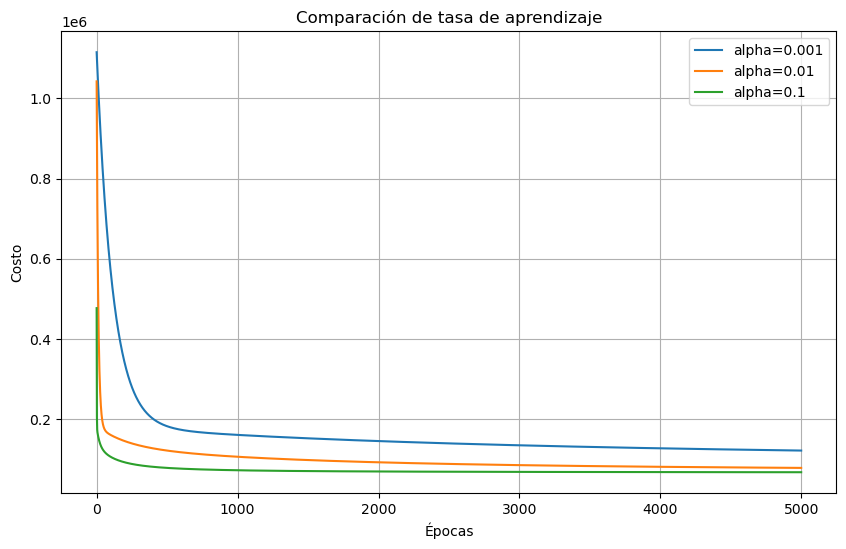

In [242]:
# Probar diferentes alphas para comparar resultados
alphas = [0.001, 0.01, 0.1]
plt.figure(figsize=(10, 6))

for alpha in alphas:
    _, cost = gradient_descent(X_train, y_train, alpha=alpha, iterations=5000)
    plt.plot(cost, label=f"alpha={alpha}")

plt.xlabel("Épocas")
plt.ylabel("Costo")
plt.title("Comparación de tasa de aprendizaje")
plt.legend()
plt.grid(True)
plt.show()

Alpha = 0.01 controla el tamaño de los pasos que da el algoritmo para actualizar los parámetros en cada iteración. Se elige 0.01 por ser un valor conservador y comúnmente usado para evitar que el algoritmo "sobrepase" el mínimo de la función de costo (divergencia)
Si alpha es demasiado grande (ej. 01) el costo puede oscilar o incluso divergir.
Si alpha es demasiado pequeño (ej. 0.00001), el entrenamiento será muy lento y puede no converger en las épocas asignadas. 

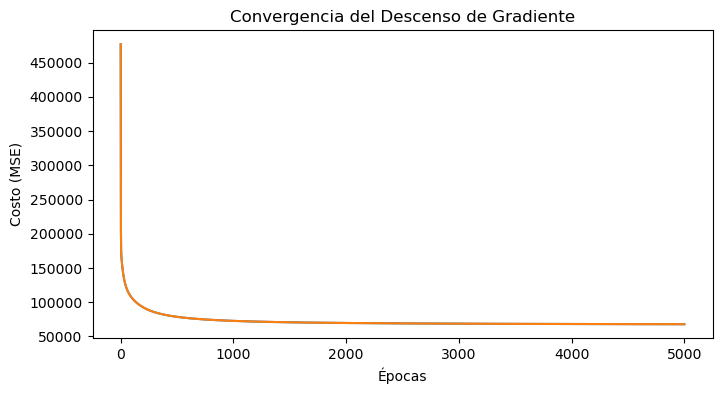

In [245]:
# Graficar el historial del costo
plt.figure(figsize=(8, 4))
plt.plot(range(epochs), cost_history)
plt.plot(range(epochs), cost_history)
plt.xlabel("Épocas")
plt.ylabel("Costo (MSE)")
plt.title("Convergencia del Descenso de Gradiente")
plt.show()

### Evaluación del modelo en conjunto de prueba

Verificación preliminar de dimensiones, nos aseguramos que el número de columnas en x_train coincida con el número de filas en theta_final para que el producto matricial sea válido.

In [249]:
print("Dimensiones de X_train:", X_train.shape)          # Debe ser (n_train, n_features + 1)
print("Dimensiones de theta_final:", theta_final.shape)  # Debe ser (n_features + 1, 1)

Dimensiones de X_train: (893, 21)
Dimensiones de theta_final: (21, 1)


#### Evaluación del modelo en el conjutno de prueba

In [252]:
y_pred = predict(X_test, theta_final)
mse_test  = compute_cost(X_test, y_test, theta_final) * 2  # pasamos de 1/2m a 1/m
rmse_test = np.sqrt(mse_test)
r2        = r_squared(y_test, y_pred)

print(f"MSE test:  {mse_test:.4f}")    # En cuanto mas bajo mejor
print(f"RMSE test: {rmse_test:.4f}")   
print(f"R² test:   {r2:.4f}")          # debería ser cercano a 1 

MSE test:  146988.6914
RMSE test: 383.3910
R² test:   0.7754


$(R^2)$ 0.7754: el modelo explica aproximadamente el 77.5% de la variabilidad de los datos reales, este es un valor razonablemente bueno.  

383 dólares es aproximadamente el 30% del precio promedio (383/1823 = 0.30).
Es menor que la desviación estándar (792 dólares), lo que indica que el error es menor que la variabilidad natural del precio en el dataset. 
Dado que el vango va desde 200 hasta casi 7,000 y que los precios varían mucho, un error de 383 es aceptable para un modelo de regresión lineal con alta dispersión.

In [256]:
print("Estadísticas básicas del precio:")
print("Mínimo precio: ", df['Price'].min())
print("Máximo precio: ", df['Price'].max())
print("Precio promedio (media): ", df['Price'].mean())
print("Desviación estándar del precio: ", df['Price'].std())

Estadísticas básicas del precio:
Mínimo precio:  196.61999999999998
Máximo precio:  6891.869999999999
Precio promedio (media):  1282.515036470588
Desviación estándar del precio:  791.8503297176693


In [258]:
#Verificar dimensiones de y_pred
print("y_pred shape:", y_pred.shape)  # Debería coincidir con y_test.shape
print("y_pred shape:", y_test.shape) 

y_pred shape: (382, 1)
y_pred shape: (382, 1)


### Visualización de resultados

#### Matriz de correlación:
Ahora que todas las variables han sido normalizadas, limpiadas y categorizadas adecuadamente

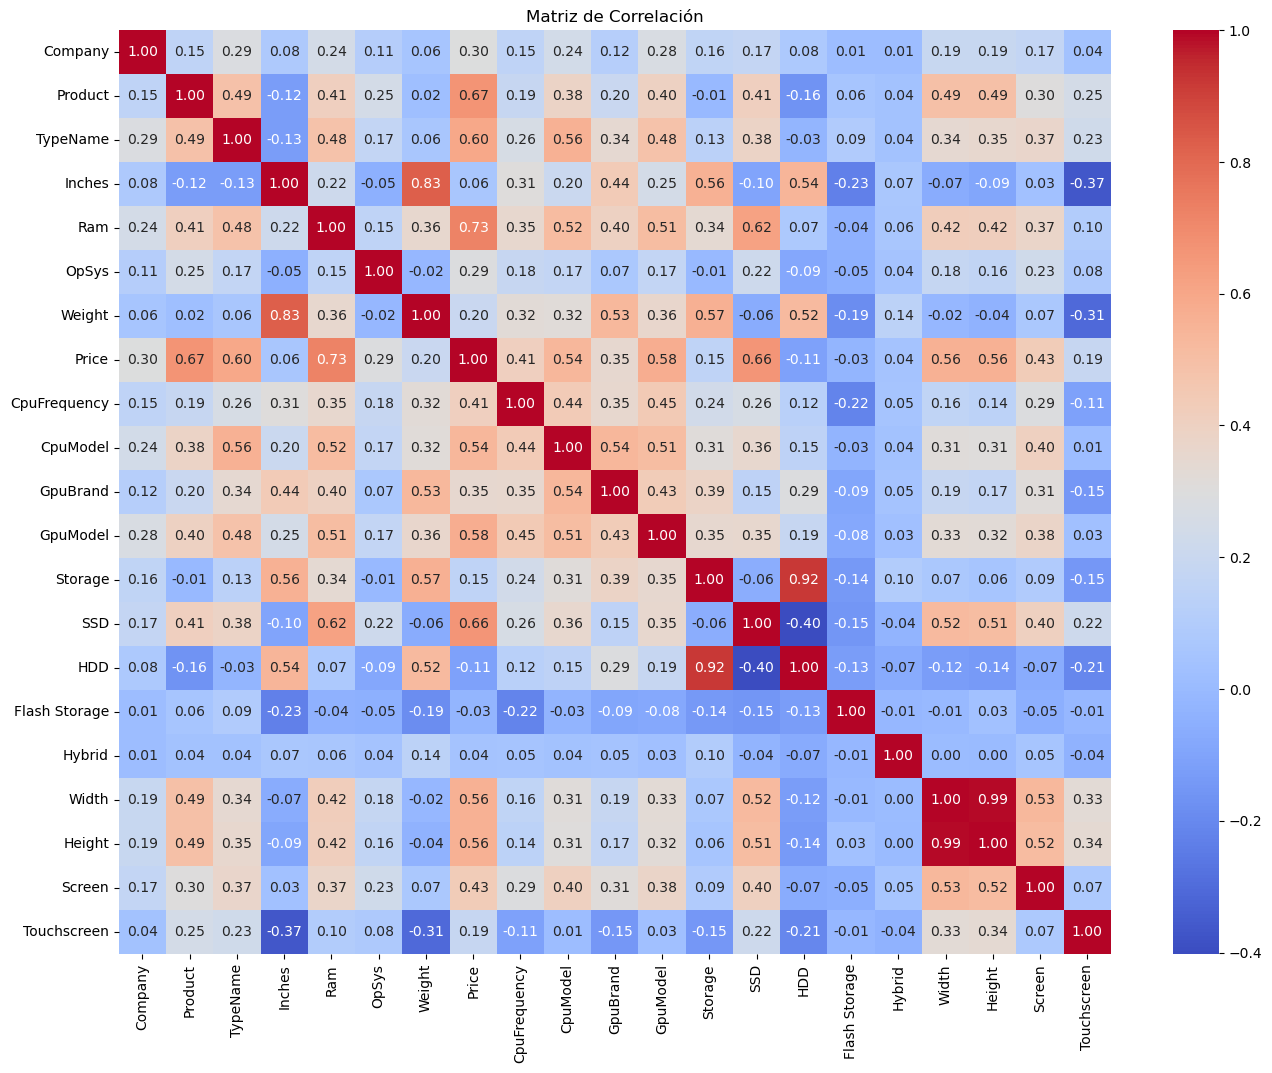

In [266]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

Al analizar esta matriz, podemos observar que las variables que más tienen relación con el precio son: la RAM, el modelo y frecuencia de la CPU, la marca de la GPU, el SSD que tiene el dispositivo, el tipo de pantalla, tanto el alto como ancho de esta misma y el sistema operativo. Al ser el SSD el tipo de almacenamiento que más afecta al precio significa que es el tipo que más se encuentra entre las laptops del dataset.

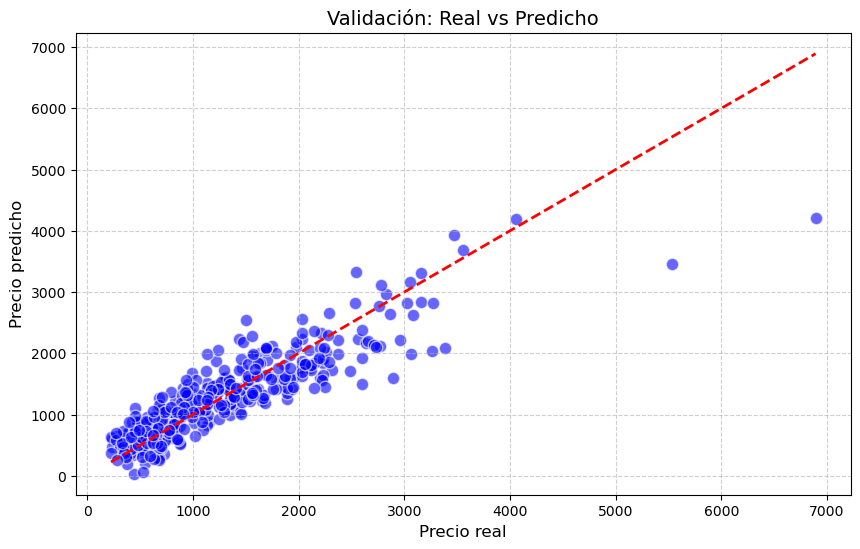

In [272]:
import numpy as np

# Verificación final
assert len(y_test) == len(y_pred), f"Tamaños diferentes: {len(y_test)} vs {len(y_pred)}"

# Gráfico con verificación de errores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, c='blue', edgecolors='w', s=80)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Precio real", fontsize =12)
plt.ylabel("Precio predicho",fontsize=12)
plt.title("Validación: Real vs Predicho",fontsize=14)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

### Interpretación de coeficientes

Los coeficientes theta de la regresión lineal, indican cuánto cambia el valor de la variable objetivo (Price) al aumentar en una unidad la característica correspondiente, manteniendo las demás constantes.
- El coeficiente positivo implica una relación directa: al aumentar la característica, también aumenta el precio.
- El coeficiente negativo indica una relación inversa: al aumentar la característica, disminuye el precio.

In [274]:
# Obtener nombres de características (excluyendo el bias)
feature_names = ['Intercepto'] + df.drop('Price', axis=1).columns.tolist()

# Mostrar coeficientes
for name, coef in zip(feature_names, theta_final.flatten()):
    print(f"{name}: {coef:.6f}")

Intercepto: -664.560146
Company: 232.365870
Product: 1528.830631
TypeName: 232.657841
Inches: -44.811869
ScreenResolution: 1974.193644
Cpu: 191.746037
Ram: 415.179805
Memory: 424.165255
Gpu: 3.323378
OpSys: 2.384734
Weight: 404.890472


### Comparación de resultados con LinearRegression de sklearn

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Entrenamiento usando LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred_sklearn = model.predict(X_test)

# Evaluación
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("Regresion linear con sklearn")
print(f"MSE: {mse_sklearn:.4f}")
print(f"RMSE: {rmse_sklearn:.4f}")
print(f"R^2: {r2_sklearn:.4f}")

Regresion linear con sklearn
MSE: 143389.5552
RMSE: 378.6681
R^2: 0.7809


### Validación cruzada con KFold

In [228]:
from sklearn.model_selection import KFold

def k_fold_cv_sklearn(X, y, k=5, alpha=0.1, iterations=5000):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    rmse_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X):
        X_train_k, X_val_k = X[train_index], X[val_index]
        y_train_k, y_val_k = y[train_index], y[val_index]

        theta_k, _ = gradient_descent(X_train_k, y_train_k, alpha, iterations)
        y_pred_k = predict(X_val_k, theta_k)

        rmse_k = np.sqrt(compute_cost(X_val_k, y_val_k, theta_k) * 2)
        r2_k = r_squared(y_val_k, y_pred_k)

        rmse_scores.append(rmse_k)
        r2_scores.append(r2_k)

    print(f"Promedio RMSE: {np.mean(rmse_scores):.4f}")
    print(f"Promedio R²:   {np.mean(r2_scores):.4f}")
    return rmse_scores, r2_scores

# Llamada al K-Fold con tus datos
k_fold_cv_sklearn(X_train, y_train, k=5, alpha=0.1, iterations=5000)


Dimensiones de theta: (21, 1)
Dimensiones de theta: (21, 1)
Dimensiones de theta: (21, 1)
Dimensiones de theta: (21, 1)
Dimensiones de theta: (21, 1)
Promedio RMSE: 378.5123
Promedio R²:   0.7653


([375.86132004399485,
  396.1831819972177,
  403.3935605070126,
  344.5166203474197,
  372.60683567275134],
 [0.7645241034577901,
  0.7612254971973391,
  0.766349252705282,
  0.7588236051842114,
  0.7753810697783673])

KFold verifica las dimensiones en cada pliege, y los resultados en todos ellos indican que el modelo posee 20 características más el término de bias (intercepto).
El valor RMSE de 0.0802 es un valor bajao, lo que sugiere que el modelo tiene un buen desempeño, ya que y representa precios en miles, un error de ±0.08 miles es aceptable.
El RMSE es significativamente menor a la desviación estándar, lo que indica que el modelo es útil.

# Regresión logística multiclase

La regresión logística es normalmente un modelo de clasificación binaria, es decir, distingue entre dos clases (por ejemplo: "spam" vs "no spam").
Pero si se tienen más de dos clases (por ejemplo, clasificar entre 3 marcas de vehículos), se necesita adaptar el modelo. Aquí es donde entra el enfoque One-vs-Rest:

*¿Cómo funciona One-vs-Rest?*
Suponiendo que se tienen tres clases: A, B y C.
Con One-vs-Rest vas a entrenar un clasificador binario por cada clase:
* Clasificador 1: ¿Es A o no? (A vs B+C)
* Clasificador 2: ¿Es B o no? (B vs A+C)
* Clasificador 3: ¿Es C o no? (C vs A+B)
Cada uno de estos clasificadores se entrena por separado usando regresión logística binaria. Luego, cuando se hace una predicción, cada uno da una probabilidad, y se elige la clase con la mayor probabilidad.

Inicialmente importaremos todas las librerias necesarias para la ejecución de nuestros procesos:

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

# Configurar estilo de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

Ahora cargaremos los datasets que se utilizarán, estos estan en el siguiente orden de carpetas y mostramos los primeros registros del dataset

```bash
|--datasources
   |--parkinsons
```

In [45]:
df = pd.read_csv("./datasources/parkinsons/parkinsons.data")
df = df.drop_duplicates()
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Una vez revisados algunos datos y cargadas las dependencias necesarios, vamos a explorar la información del dataset

In [48]:
print("Información del dataset:")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print("\nDistribución de la variable objetivo:")
print(df['status'].value_counts())
print("\nPorcentaje de cada clase:")
print(df['status'].value_counts(normalize=True) * 100)

# Mostramos los tipos de datos por columnas
print("\nTipos de datos en cada columna:")
print(df.dtypes)

# Verificamos si existen valores faltantes
print("\nValores faltantes en cada columna:")
print(df.isnull().sum())


Información del dataset:
Número de filas: 195
Número de columnas: 24

Distribución de la variable objetivo:
status
1    147
0     48
Name: count, dtype: int64

Porcentaje de cada clase:
status
1    75.384615
0    24.615385
Name: proportion, dtype: float64

Tipos de datos en cada columna:
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Valores faltantes en cad

Ahora vamos a explorar cada una de las características que podemos encontrar en el dataset en busca de patrones y relaciones en la información, en este caso definiremos una variable que excluya los elementos que no son de tipo numérico para poder generar la matriz de correlación, tomando la variable "status" como objetivo porque es la que indica la presencia  o ausencia de Parkinson y permite encontrar qué características tienen mayor relación con la enfermedad

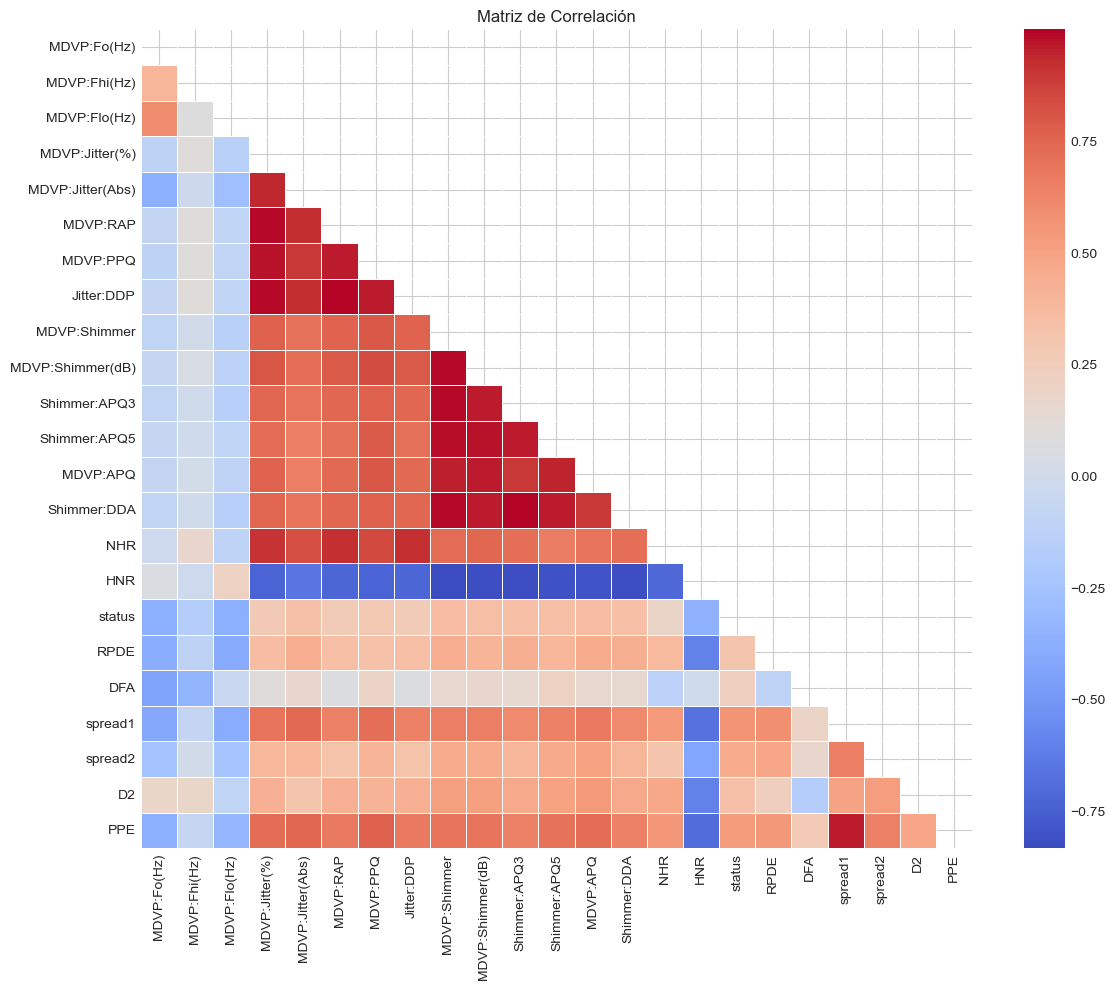

In [51]:

# Definimos las estadísticas descriptivas de las columnas numéricas
df.describe().T.sort_values(by='mean', ascending=False)

# Definimos las dimensiones para los gráficos
plt.figure(figsize=(12, 10))

# Generamos un nuevo dataframe que solo involucra valores numéricos
numeric_df = df.select_dtypes(include=['number'])

# Generamos la matriz de correlación con la variable que tenemos como objetivo: status
correlation_matrix = numeric_df.corr()

mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

De esta gráfica de la matriz de correlación, podemos destacar lo siguiente:
Tenemos grupos de variables altamente correlacionada, las que están en rojo, entre diversas medidas de Jitter y Shimmer (MDVP, MDVP, Jitter, etc.), lo cual indica que muchas de estas características que miden variaciones en la voz están fuertemente relacionadas entre sí.

Tenemos grupos de correlaciones negativas, por ejemplo, e observa que HNR (Harmonic to Noise Ratio) tiene correlaciones negativas (en azul) con varias medidas de Jitter y Shimmer, y esto tiene sentido puesto a que HNR mide la calidad de la voz, mientras que Jitter y Shimmer miden irregularidades

También tenemos grupos de variables potencialmente importantes, por ejemplo, las medidas como PPE, spread1, y spread2 parecen tener patrones de correlación interesantes con otras variables, mientras que DFA muestra un patrón de correlación más débil y diferenciado.

In [53]:
# Seleccionamos las primeras  10 características con mayor correlación con 'status'
correlations = numeric_df.corr()['status'].sort_values(ascending=False)
print("Top 10 características con mayor correlación con 'status':")
print(correlations.head(11))  # 11 porque 'status' también está en la lista

Top 10 características con mayor correlación con 'status':
status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
Name: status, dtype: float64


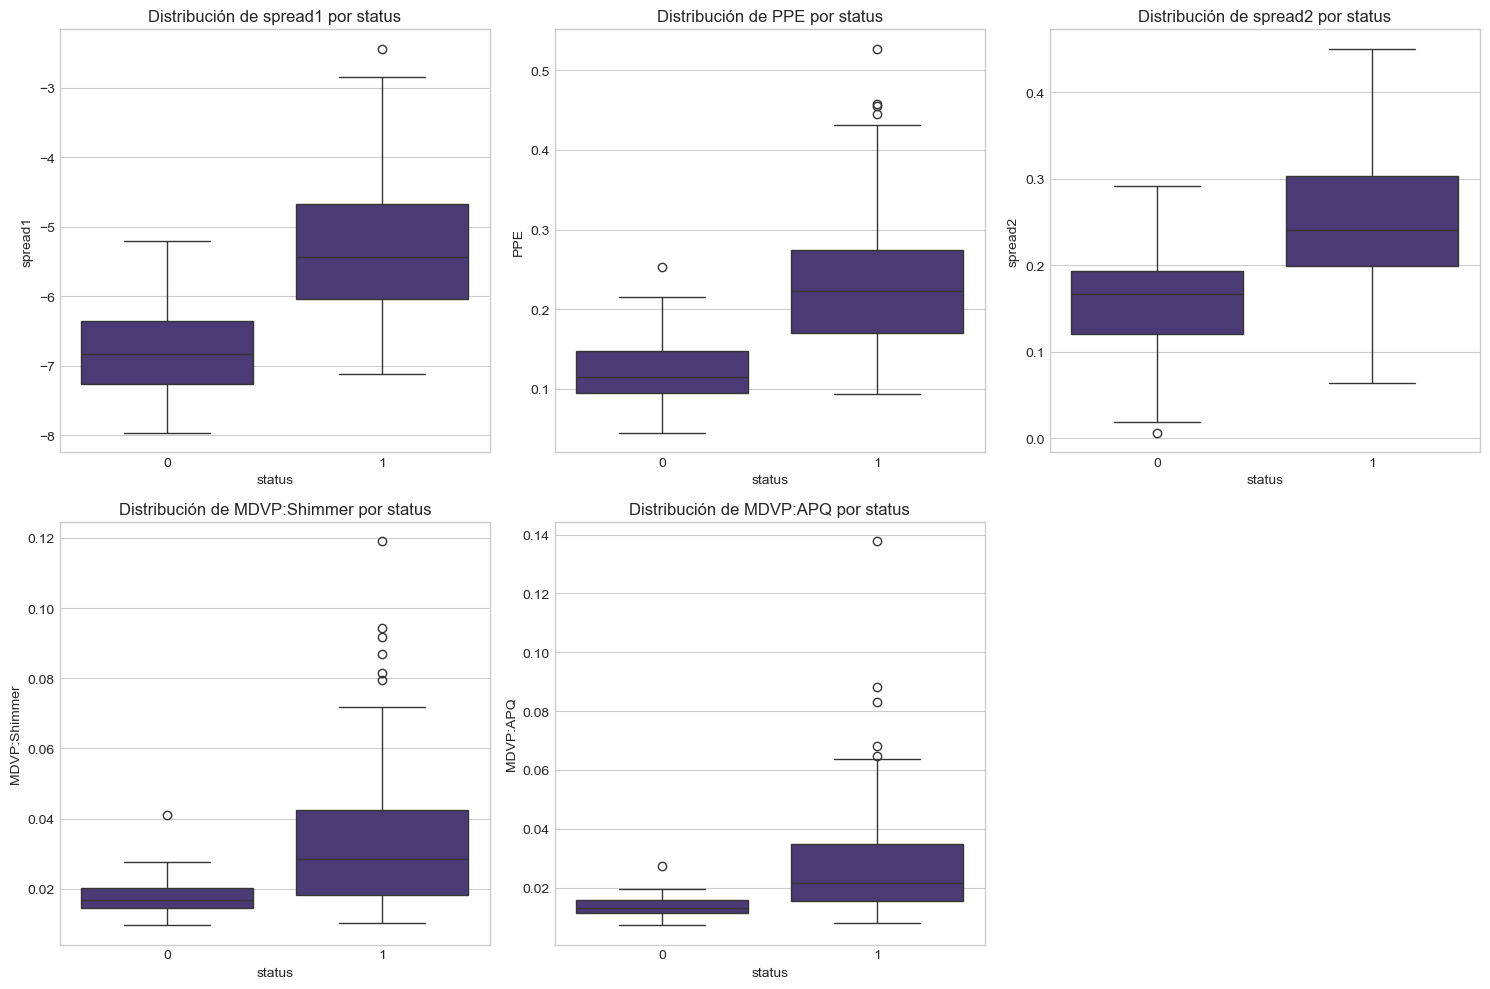

In [55]:
# Obtenemos la distribución de algunas otras características importantes según su correlación con 'status'
top_features = correlations.index[1:6]  # Aquí excluimos 'status'

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='status', y=feature, data=df)
    plt.title(f'Distribución de {feature} por status')
plt.tight_layout()
plt.show()

Del gráfico de relaciones podemos decir lo siguiente:
#### Distribución de spread1 por status
- Los valores de spread1 son notablemente más bajos en personas sanas (0) que en pacientes con Parkinson (1)
- Personas sanas: Valores principalmente entre -8 y -5
- Personas con Parkinson: Valores entre -7 y -3, con una mediana significativamente más alta

#### Distribución de PPE por status
- PPE (otra medida no lineal de variación de frecuencia fundamental)
- Los valores consistentemente más bajos en personas sanas (principalmente entre 0.05 y 0.15)
- Los valores más altos y con mayor dispersión en personas con Parkinson (aproximadamente entre 0.1 y 0.4)

#### Distribución de spread2 por status
- Hay un contraste significativo: Valores más bajos en personas sanas (mayormente entre 0 y 0.2)
- Valores más altos en personas con Parkinson (principalmente entre 0.1 y 0.4)

#### Distribución de MDVP por status: Shimmer (que es una medida de variabilidad en la amplitud vocal)
- Los valores significativamente más bajos en personas sanas (alrededor de 0.02)
- Los Valores más altos en pacientes con Parkinson (entre 0.02 y 0.04)
- Varios valores atípicos en el grupo con Parkinson, que indica mayor variabilidad

#### Distribución de MDVP por status: APQ (que es otra medida de perturbación de amplitud)
- Patrón similar al Shimmer: valores más bajos en personas sanas
- Valores más altos y mayor dispersión en personas con Parkinson
- Varios valores atípicos en el grupo con Parkinson

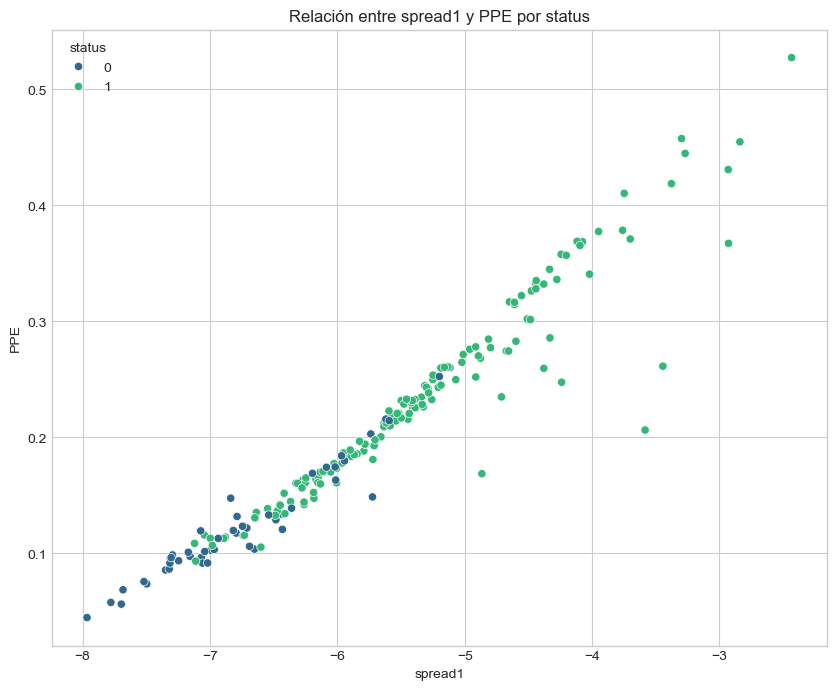

In [57]:
# Obtenemos la relación entre las dos características más correlacionadas con 'status'
plt.figure(figsize=(10, 8))
sns.scatterplot(x=top_features[0], y=top_features[1], hue='status', data=df, palette='viridis')
plt.title(f'Relación entre {top_features[0]} y {top_features[1]} por status')
plt.show()

Del gráfico anterior podemos visualizar la relación entre las características spread1 y PPE, diferenciando entre individuos sanos (los cuales tienen status=0 y se identifican con puntos azules) y personas con enfermedad de Parkinson (las cuales tienen status=1 y se identifican con puntos verdes).

#### Separación entre grupos
- Los individuos sanos se concentran en la esquina inferior izquierda
- Las personas con Parkinson se distribuyen hacia la derecha y arriba


#### Correlación positiva fuerte:
- Existe una relación aproximadamente lineal positiva entre spread1 y PPE
- A medida que spread1 aumenta (se vuelve menos negativo), PPE también aumenta


#### Rangos de valores:
- Personas sanas
  - spread1: aproximadamente entre -8 y -6.5
  - PPE: aproximadamente entre 0.05 y 0.15
- Personas con Parkinson (verde):
  - spread1: principalmente entre -6.5 y -3
  - PPE: principalmente entre 0.1 y 0.5

### Preprocesamiento para Regresión Logística
Vamos a preparar los datos para el entrenamiento del modelo, para ello se inicia con estandarización (z-score normalization), la cual se calcula utilizando la siguiente formula:

$$ z = \frac{x - \mu}{\sigma} $$

Donde $\mu$ es la media y $\sigma$ es la desviación estándar

In [59]:
class ManualScaler:
    """
    Implementación manual de estandarización usando z-score normalization
    Fórmula: z = (x - μ) / σ
    """
    def __init__(self):
        self.mean_ = None     # Almacena la media de los datos
        self.std_ = None      # Almacena la desviación estándar de los datos
        self.fitted = False   # Para identificar si el escalador ha sido ajustado
    
    def fit(self, X):
        X = np.array(X)
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0, ddof=0)  # ddof=0 para población, ddof=1 para muestra
        self.std_ = np.where(self.std_ == 0, 1, self.std_)
        self.fitted = True
        return self

    # Aplica la transformación z-score
    def transform(self, X):
        if not self.fitted:
            raise ValueError("Ajustar scaler antes de transformar los datos")
        X = np.array(X)
        X_scaled = (X - self.mean_) / self.std_
        return X_scaled

    # Ajusta y transforma los datos en un solo paso
    def fit_transform(self, X):
        return self.fit(X).transform(X)

    # Revierte la transformación para obtener los valores originales
    def inverse_transform(self, X_scaled):
        if not self.fitted:
            raise ValueError("Ajustar scaler antes de transformar los datos inversamente")
        X_scaled = np.array(X_scaled)
        X_original = X_scaled * self.std_ + self.mean_
        return X_original

Ahora que tenemos una clase con las funcionalidades necesarias para el cálculo de la normalización, podemos instanciarla para realizar los cálculos correspondientes, las cuales son:

Calcular la media y la desviación estándar para los datos de entrenamiento con $z = \frac{x - \mu}{\sigma}$
Aplicar la estandarización usando los valores calculados en la función fit()
Combinar la función fit() y transform() para una sola transformación
Revierte la estandarización con la fórmula $ x = z \cdot {\sigma}  + \mu$

In [61]:
# Dividimos las características (X) y la variable objetivo (y)
X = df.drop(['status', 'name'], axis=1)  # Excluimos 'name' ya que es un identificador
y = df['status']

# Dividimos los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizamos las características para mejorar la convergencia del descenso de gradiente
scaler = ManualScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dimensiones de X_train_scaled: {X_train_scaled.shape}")
print(f"Dimensiones de X_test_scaled: {X_test_scaled.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train_scaled: (136, 22)
Dimensiones de X_test_scaled: (59, 22)
Dimensiones de y_train: (136,)
Dimensiones de y_test: (59,)


## Implementación de Regresión Logística con Descenso de Gradiente
Una vez hemos preprocesado los datos para el análisis, implementaremos la regresión logística utilizando el Gradient Descent para optimizar los parámetros del modelo, para esto, los pasos a seguir son:
* Obtener valores a probabilidades con la función sigmoid, limitando valores para evitar el desboramiento numérico
* Obtener la pérdida logística
  * Fijar un epsilon pequeño para evitar que se llegue a log(0)
  * Calcular la pérdida logística
* Entrenar el modelo usando Descenso de Gradiente
  * Se recorre el dataset
  * Se obtiene el paso forward
  * Se calculan los gradientes
  * Se calcula y almacena la pérdida
  * Se Verifica la convergencia temprana


In [63]:
class LogisticRegressionGD:
    """
    Implementación de Regresión Logística con Descenso de Gradiente
    """
    
    # Inicializa el modelo con parámetros por defecto
    def __init__(self, learning_rate=0.01, n_iterations=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tol = tol
        self.weights = None
        self.bias = None
        self.losses = []

    # Mapea valores a [0,1]
    def sigmoid(self, z):
        """Función sigmoid para transformar valores a probabilidades"""
        # Evitamos el desbordamiento numérico
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """Función de pérdida logística (cross-entropy)"""
        m = X.shape[0]                               # Número de muestras
        z = np.dot(X, self.weights) + self.bias
        h = self.sigmoid(z)                          # Probabilidades predicas
        
        # Estabilización numérica
        epsilon = 1e-15                              # Evitar log(0) agregando un epsilon pequeño
        h = np.clip(h, epsilon, 1 - epsilon)
        
        # Cálculo de la pérdida logística (cross-entropy)
        loss = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return loss

    def fit(self, X, y):
        """Entrenamos el modelo usando descenso de gradiente"""
        # Inicializamos parámetros
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        
        # Ejecución del Descenso de gradiente
        for i in range(self.n_iterations):
            # Obtenemos Paso forward
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)
            
            # Calculamos gradientes
            dw = (1/m) * np.dot(X.T, (h - y))
            db = (1/m) * np.sum(h - y)
            
            # Actualización de parámetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculamos y almacenamos la pérdida
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Verificamos convergencia temprana
            if i > 0 and abs(self.losses[i] - self.losses[i-1]) < self.tol:
                print(f"Convergencia alcanzada en la iteración {i}")
                break
            
            # Imprimimos el progreso cada 100 iteraciones
            if i % 100 == 0:
                print(f"Iteración {i}, Pérdida: {loss:.6f}")
                
        return self

    def predict_proba(self, X):
        """Predecimos probabilidades de clase"""
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    # Predice clases binarias (0 o 1) usando un umbral que por defecto es de 0.5
    def predict(self, X, threshold=0.5):
        """Predecimos clase (0 o 1)"""
        return (self.predict_proba(X) >= threshold).astype(int)

### One-vs-Rest

Ahora que tenemos una clase con métodos que necesarios para la implementación de la regresión logística, procederemos a implementar la estrategia One-vs-Rest para mostrar el funcionamiento en casos multiclase, en la cual los pasos a seguir son:
* Entrenar un clasificador binario para cada clase
* Crear etiquetas binarias por cada elemento, con los valores 1 para la clase actual y 0 para el resto
* Crear y entrenar el clasificador para cada clase que se esté iterando
* Almacenar el clasificador entrenado
* Crear una matriz de probabilidades y calcular la probabilidad de casa clase
* Se calcula la clase con mayor probabilidad


In [66]:
class OneVsRestLogisticRegression:
    """
    Implementamos One-vs-Rest para clasificación multiclase
    usando regresión logística con descenso de gradiente
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tol = tol
        self.classifiers = {}
        self.classes = None
        
    def fit(self, X, y):
        """Entrenamos un clasificador binario para cada clase"""
        self.classes = np.unique(y)
        
        for c in self.classes:
            print(f"\nEntrenando clasificador para clase {c}")
            
            # Crear etiquetas binarias (1 para la clase actual, 0 para el resto)
            y_binary = (y == c).astype(int)
            
            # Crear y entrenar un clasificador para esta clase
            clf = LogisticRegressionGD(
                learning_rate=self.learning_rate,
                n_iterations=self.n_iterations,
                tol=self.tol
            )
            clf.fit(X, y_binary)
            
            # Almacenar el clasificador
            self.classifiers[c] = clf
        
        return self
    
    def predict_proba(self, X):
        """Predecimos probabilidades para cada clase"""
        # Creamos una matriz de probabilidades (muestras x clases)
        proba = np.zeros((X.shape[0], len(self.classes)))

        
        # Predecimos la probabilidad para cada clase
        for i, c in enumerate(self.classes):
            proba[:, i] = self.classifiers[c].predict_proba(X)
            
        return proba
    
    def predict(self, X):
        """Predecimos la clase con mayor probabilidad"""
        proba = self.predict_proba(X)
        return self.classes[np.argmax(proba, axis=1)]

Ahora que hemos desarrollado la lógica necesaria para la implementación de la regresión logística con optimización por Gradient Descent, procedemos a entrenar el modelo y evaluar su rendimiento, siguiendo los siguientes pasos:
* Entrenar el model con los datos necesarios
* Realizar predicciones en el conjunto de datos de prueba
* Evaluar el rendimiento del modelo para corroborar el correcto funcionamiento del mismo

In [68]:
# Entrenamos el modelo con los datos de entrenamiento
model = OneVsRestLogisticRegression(learning_rate=0.1, n_iterations=1000)
model.fit(X_train_scaled, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nExactitud (Accuracy): {accuracy:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nInforme de Clasificación:")
print(class_report)


Entrenando clasificador para clase 0
Iteración 0, Pérdida: 0.644723
Iteración 100, Pérdida: 0.331333
Iteración 200, Pérdida: 0.301078
Convergencia alcanzada en la iteración 265

Entrenando clasificador para clase 1
Iteración 0, Pérdida: 0.644723
Iteración 100, Pérdida: 0.331333
Iteración 200, Pérdida: 0.301078
Convergencia alcanzada en la iteración 265

Exactitud (Accuracy): 0.8814

Matriz de Confusión:
[[ 9  6]
 [ 1 43]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59



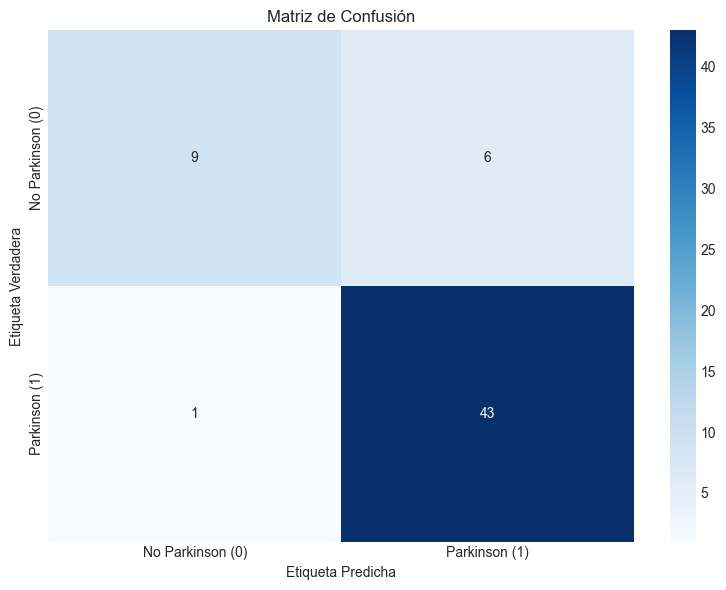

In [60]:
# Mostramos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Parkinson (0)', 'Parkinson (1)'],
            yticklabels=['No Parkinson (0)', 'Parkinson (1)'])
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.tight_layout()
plt.show()

Una vez hemos ejecutado el proceso, y obtenido la gráfica anterior, podemos observar los resultados:

- Verdaderos Negativos (arriba-izquierda): 9 casos
  - Personas correctamente clasificadas como no teniendo Parkinson
- Falsos Positivos (arriba-derecha): 6 casos
  -Personas sanas incorrectamente clasificadas como teniendo Parkinson
- Falsos Negativos (abajo-izquierda): 1 caso
  - Persona con Parkinson incorrectamente clasificada como sana
- Verdaderos Positivos (abajo-derecha): 43 casos
  - Personas correctamente clasificadas como teniendo Parkinson

Ahora, con esta información podemos explicar el listado de resultados previo al gráfico
- Exactitud (Accuracy): (9 + 43) / (9 + 6 + 1 + 43) = 52/59 ≈ 88.1%
  - Porcentaje total de predicciones correctas
- Sensibilidad/Recall para Parkinson: 43 / (43 + 1) = 43/44 ≈ 97.7%
  - Capacidad del modelo para identificar correctamente a las personas con Parkinson
  - En este caso vemos que es muy alta, lo cual es crucial para un sistema de detección médica
- Especificidad para Parkinson: 9 / (9 + 6) = 9/15 = 60%
  - Capacidad del modelo para identificar correctamente a las personas sanas
  - En este caso vemos que es moderada, indicando cierta tendencia a sobrediagnosticar casos
- Precisión para Parkinson: 43 / (43 + 6) = 43/49 ≈ 87.8%
  - De todos los diagnosticados como Parkinson, qué porcentaje realmente tiene la enfermedad
- Valor predictivo negativo: 9 / (9 + 1) = 9/10 = 90%
  - De todos los diagnosticados como sanos, qué porcentaje realmente está sano

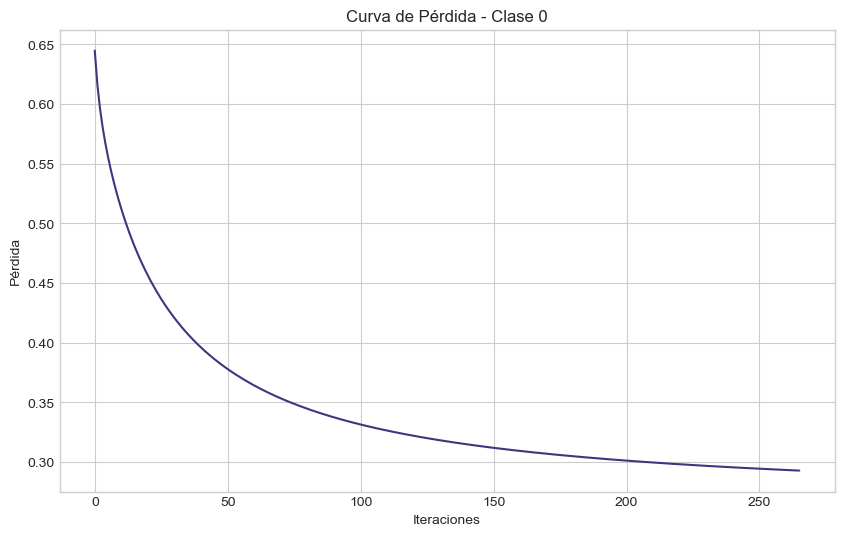

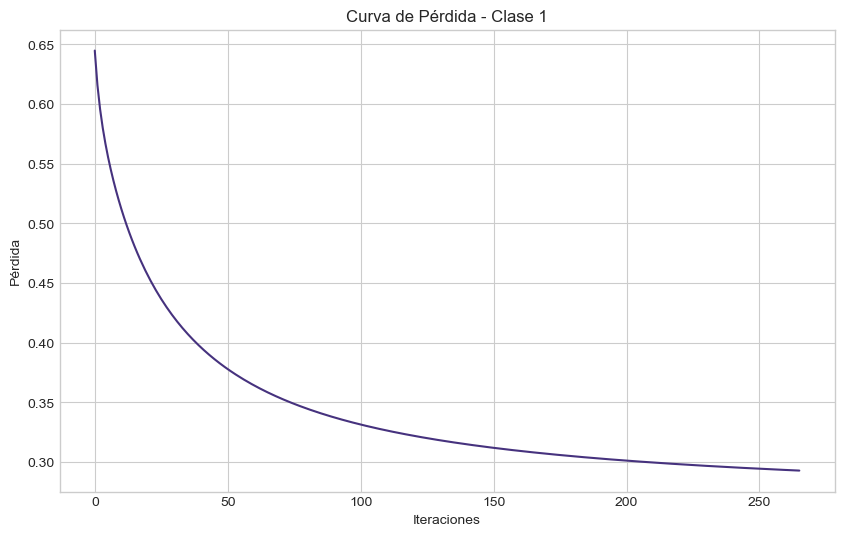

In [70]:
# Mostramos la curva de pérdida durante el entrenamiento
for c in model.classes:
    plt.figure(figsize=(10, 6))
    plt.plot(model.classifiers[c].losses)
    plt.title(f'Curva de Pérdida - Clase {c}')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pérdida')
    plt.grid(True)
    plt.show()

Para finalizar, lo que podemos observar en las gráficas de pérdidas es lo siguiente:
Análisis de las curvas de pérdida:
Imagen 1: Curva de Pérdida - Clase 0 (No Parkinson)
- Muestra tener un valor inicial alto, en el cual la pérdida iniccia alrededor de 0.60-0.65, indicando que las predicciones iniciales son deficientes. La gráfica además muestra un decenso rápido inicial, en el que se observa que existe una disminución pronunciada en las primeras 50 iteraciones, también se puede observar que la pendiente se vuelve más suave en cuanto avanza el entrenamiento, tanto que al llegar al final, la pérdida converge apróximadamente a 0.29-0.30 después de 250 iteraciones.

Imagen 2: Curva de Pérdida - Clase 1 (Parkinson)
Esta curva muestra la evolución de la función de pérdida para el clasificador de la clase 1 (Parkinson):
- Muestra un valor inicial similar con respecto al gráfico de la imagen uno, teniendo una pérdida alta entre 0.60-0.65, que tiene un patrón de descenso rápido inicial, seguido de una convergencia más gradual que se alcanza luego de 250 iteraciones con un valor de convergencia aproximadamente de 0.29-0.30.

Con lo cual podemos concluir que obtuvimos una convergencia exitosa, ya que ambas curvas muestran una clara tendencia descendente y un comportamiento de convergencia, lo que indica que el algoritmo de descenso de gradiente está funcionando correctamente, manteniendo una tasa de prendizaje adecuada que se interpreta por la forma suave de las curvas, mostrando que no es tan alta para generar oscilaciones, ni tan bajas como para volver la convergencia más lenta de lo ideal, alcanzando su convergencia con un número adecuado de iteraciones.